In [ ]:
# 3. Use your webcam and record a movie, write a motion detection code and print the message "Motion Detected" on the
#    original frame. Try to make a better visualization by using different masking.
import cv2
import numpy as np
import matplotlib.pyplot as plt
cv2.ocl.setUseOpenCL(False) #added to try and fix jupyter crashing with imshow().

video_filepath = "/Users/adam/Desktop/example_motion480.mov"

cap=cv2.VideoCapture(video_filepath) # import video capture 

return1, frame1=cap.read() #first frame reference
return2, frame2=cap.read() #second frame reference

while True:
    #get gray scales
    frame1_gray=cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    frame2_gray=cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    
    #get gaussian blurs
    frame1_blur=cv2.GaussianBlur(frame1_gray, (21, 21), 0)
    frame2_blur=cv2.GaussianBlur(frame2_gray, (21, 21), 0)
    
    frames_diff = cv2.absdiff(frame1_blur, frame2_blur) #get difference between frames
    
    #various filters provided in lecture
    thresh = cv2.threshold(frames_diff,20,255,cv2.THRESH_BINARY)[1]
    final = cv2.dilate(thresh, None, iterations=2)    
    masked = cv2.bitwise_and(frame1,frame1, mask=thresh)
    
    #calculate motion example
    white_pixels=np.sum(thresh)/255
    rows,cols = thresh.shape
    total=rows*cols
    
    #if detected -> output text indicating such
    if white_pixels > 0.01*total:
        font = cv2.FONT_HERSHEY_PLAIN
        cv2.putText(frame1, "Motion Detected!",(10,50),font,1,(0,0,255),2,cv2.LINE_AA)
    
    #output image frame.     
    cv2.imshow("Example Motion Video", frame1)
    
    #update frames iteratively
    frame1 = frame2
    returns, frame2 = cap.read()
    
    #break if no remaining reads
    if not returns:
        break
        
    #get input from user or if window is exited end loop
    k = cv2.waitKey(10) & 0xff
    if k == 2 or cv2.getWindowProperty("Example Motion Video", 0) < 0:
        break   

# handle closing of windows. At least on my Mac, still has issue where a Python session attached to the
# opened video window stays active and blocks Jupyter execution until it is manually closed outside Jupyter
cv2.waitKey(0)
cv2.destroyAllWindows()
cap.release() 

# Of Faces found:  10


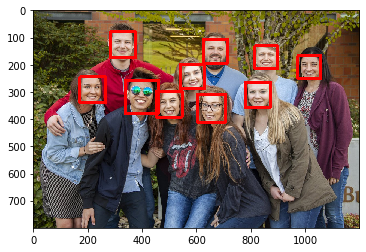

In [2]:
# 4. Use a group picture of a minimum of 4 faces and try to detect as many as faces that you can.
#    Draw red rectangle around the detected faces.

import cv2 
import numpy as np
import matplotlib.pyplot as plt

image_filepath = "/Users/adam/Desktop/group_image.png"

# load image
test_image = cv2.imread(image_filepath)

# convert image to gray scale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY);

# output the image
plt.imshow(test_image_gray, cmap='gray')

# import haar cascade face from repo provided in lecture notes
haar_cascade_face = cv2.CascadeClassifier('/Users/adam/Desktop/Face-Detection-in-Python-using-OpenCV/data/haarcascades/haarcascade_frontalface_alt2.xml')

# detect multiple faces
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# output number of faces detected
print('# Of Faces found: ', len(faces_rects))

# loop through each face and draw a rectangle to image
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 0, 255), 10)  # BGR SO 0,0,255 is red
        
# convert image back to RGB color
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))